In [1]:
using DataFrames
using CSV

In [2]:
data=CSV.read("/Users/seansantellanes/Documents/RNN/us-epa-pm25-aqi.csv", DataFrame)

Row,DateTime,Average,LRAPA-Amazon Park A,LRAPA-Amazon Park B
,String31,Float64?,Int64,Int64
1,2024-06-20 13:30:00,23.3,27,28
2,2024-06-20 13:40:00,missing,30,30
3,2024-06-20 13:50:00,missing,28,28
4,2024-06-20 14:00:00,missing,27,28
5,2024-06-20 14:10:00,missing,27,28
6,2024-06-20 14:20:00,missing,25,26
7,2024-06-20 14:30:00,missing,24,25
8,2024-06-20 14:40:00,missing,23,24
9,2024-06-20 14:50:00,missing,21,23


In [3]:
data=data[:,Not(2)];


In [35]:
using Statistics
data2=select(data, :"LRAPA-Amazon Park A",:"LRAPA-Amazon Park B",
 AsTable([:"LRAPA-Amazon Park A",:"LRAPA-Amazon Park B"]) => x
  -> (data."LRAPA-Amazon Park A"+data."LRAPA-Amazon Park B")/2)

Row,LRAPA-Amazon Park A,LRAPA-Amazon Park B,LRAPA-Amazon Park A_LRAPA-Amazon Park B_function
,Int64,Int64,Float64
1,27,28,27.5
2,30,30,30.0
3,28,28,28.0
4,27,28,27.5
5,27,28,27.5
6,25,26,25.5
7,24,25,24.5
8,23,24,23.5
9,21,23,22.0


In [5]:
tar_data=select(data2, Not(1,2))
tar_data=rename!(tar_data,[:a])

Row,a
,Float64
1,27.5
2,30.0
3,28.0
4,27.5
5,27.5
6,25.5
7,24.5
8,23.5
9,22.0


In [6]:
tar_vector=Vector{Float32}(tar_data[:,:a])

415-element Vector{Float32}:
 27.5
 30.0
 28.0
 27.5
 27.5
 25.5
 24.5
 23.5
 22.0
 21.0
  ⋮
  7.0
  8.5
  8.0
  6.0
  6.0
  7.0
  8.5
  8.0
  8.0

In [7]:
using Flux

In [8]:
function create_sequences(data, seq_length)
    X, y = [], []
    for i in 1:(length(data) - seq_length)
        push!(X, data[i:i+seq_length-1])
        push!(y, data[i+seq_length])
    end
    return X, y
end

seq_length = 6
X, y = create_sequences(tar_vector, seq_length)

(Any[Float32[27.5, 30.0, 28.0, 27.5, 27.5, 25.5], Float32[30.0, 28.0, 27.5, 27.5, 25.5, 24.5], Float32[28.0, 27.5, 27.5, 25.5, 24.5, 23.5], Float32[27.5, 27.5, 25.5, 24.5, 23.5, 22.0], Float32[27.5, 25.5, 24.5, 23.5, 22.0, 21.0], Float32[25.5, 24.5, 23.5, 22.0, 21.0, 20.0], Float32[24.5, 23.5, 22.0, 21.0, 20.0, 22.0], Float32[23.5, 22.0, 21.0, 20.0, 22.0, 23.0], Float32[22.0, 21.0, 20.0, 22.0, 23.0, 20.0], Float32[21.0, 20.0, 22.0, 23.0, 20.0, 17.5]  …  Float32[18.5, 15.0, 10.5, 7.5, 7.0, 7.5], Float32[15.0, 10.5, 7.5, 7.0, 7.5, 8.0], Float32[10.5, 7.5, 7.0, 7.5, 8.0, 7.0], Float32[7.5, 7.0, 7.5, 8.0, 7.0, 8.5], Float32[7.0, 7.5, 8.0, 7.0, 8.5, 8.0], Float32[7.5, 8.0, 7.0, 8.5, 8.0, 6.0], Float32[8.0, 7.0, 8.5, 8.0, 6.0, 6.0], Float32[7.0, 8.5, 8.0, 6.0, 6.0, 7.0], Float32[8.5, 8.0, 6.0, 6.0, 7.0, 8.5], Float32[8.0, 6.0, 6.0, 7.0, 8.5, 8.0]], Any[24.5f0, 23.5f0, 22.0f0, 21.0f0, 20.0f0, 22.0f0, 23.0f0, 20.0f0, 17.5f0, 14.0f0  …  8.0f0, 7.0f0, 8.5f0, 8.0f0, 6.0f0, 6.0f0, 7.0f0, 8.5f0, 8.

In [9]:
X = hcat(X...)'
y = Float32.(y)

409-element Vector{Float32}:
 24.5
 23.5
 22.0
 21.0
 20.0
 22.0
 23.0
 20.0
 17.5
 14.0
  ⋮
  7.0
  8.5
  8.0
  6.0
  6.0
  7.0
  8.5
  8.0
  8.0

In [26]:
model = Chain(
    LSTM(seq_length, 50),
    Dense(50, 1)
)

# Initialize the parameters
ps = Flux.params(model)

# Define the loss function and the optimizer
loss(x, y) = Flux.mse(model(x)[:], y)
opt = ADAM(1e-2)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [27]:
epochs = 1000
batch_size = seq_length

for epoch in 1:epochs
    
    for i in 1:batch_size:(size(X, 1) - batch_size)
        x_batch = X[i:i+batch_size-1, :]
        y_batch = y[i:i+batch_size-1]
       
        gs = Flux.gradient(ps) do
            loss(x_batch, y_batch)
        end

        Flux.update!(opt, ps, gs)
    end
    #println("Epoch $epoch: Loss = $(loss(X', y))")
end

In [28]:
function predict(model, data, seq_length, num_predictions)
    input = data[end-seq_length+1:end,:]
    pred = model(input)


    return pred
end

predict (generic function with 1 method)

In [29]:

num_predictions = 6
predictions = predict(model, X, seq_length, num_predictions)
Float32.(predictions')

6×1 Matrix{Float32}:
 5.0401287
 4.0886536
 4.0433884
 5.907667
 6.952976
 4.0357056

In [30]:
using Dates
typeof(data."DateTime")
format = "yyyy-mm-dd HH:MM:SS"
dt=DateTime.(data."DateTime",format);

In [32]:
last_dt=dt[end]
for i in 1:seq_length
    last_dt+=Minute(10)
    push!(dt,last_dt)
end

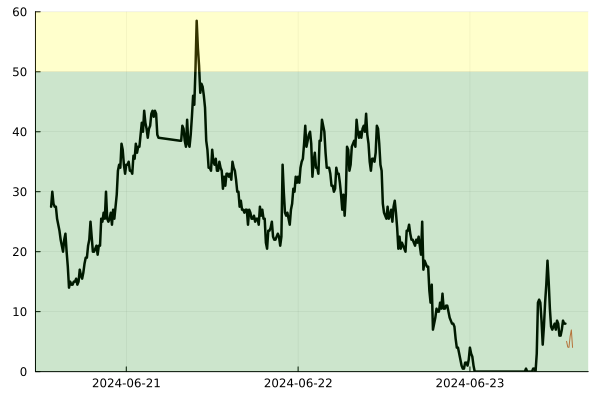

In [43]:
using Plots
predictions=convert(Vector{Float32},vec(predictions))
p=plot(dt[1:end-num_predictions], tar_vector, label="Original Data",ylims=(0,60),color=:black,lw=2.5)
plot!(p,dt[end-num_predictions+1:end], predictions, label="Predictions")
hspan!(p,[0,50],color=:green,alpha=0.2)
hspan!(p,[50,100],color=:yellow,alpha=0.2,legend=false)